# Extração e processamento de steam_games.csv

### 1. Importação dos módulos

***Obs.:*** *Optou-se por uma abordagem modular em que o main_notebook serve para executar todo o programa e dar uma visão geral. Para detalhes do funcionamento veja a pasta de src*

In [1]:
# Importação dos módulos
import src.game
from src.game import load_and_extract_games, Game
from src.export import export_to_excel

### 2. Definição dos caminhos relativos

In [2]:
# Caminhos
zip_path = "data/raw/steam_games.zip"
extract_folder = "data/raw"
csv_path = "data/raw/steam_games.csv"
excel_output = "data/processed/randon_20_lines.xlsx"

### 3. Processamento dos dados
#### 3.1. Extrair e carregar os jogos

In [3]:
# Extrair e carregar os jogos
games = load_and_extract_games(zip_path, extract_folder)

#### 3.2. Encontrar o percentual de jogos gratuitos na plataforma

In [4]:
percentual_jogos_gratuitos = Game.percentual_gratuitos(games)
print(f"📊 Percentual de jogos gratuitos: {percentual_jogos_gratuitos}")

📊 Percentual de jogos gratuitos: 17.39%


#### 3.3. Encontrar o ano com mais lançamentos de games na Steam

In [5]:
anos_com_mais_lancamentos = Game.ano_maior_numero_lancamentos(games)
print(f"📅 Ano(s) com maior número de lançamentos: {anos_com_mais_lancamentos}")

📅 Ano(s) com maior número de lançamentos: [2022]


#### 3.4. Descobrir os jogos com maior número de usuários simultâneos, juntamente com percentual de avaliações positivas e tempo médio de jogo de acordo com o *dataset*

In [6]:
top_5_jogos = Game.top_5_jogos_com_mais_usuarios(games)

print("🎮 Top 5 jogos com mais usuários simultâneos:")
for i, jogo in enumerate(top_5_jogos, 1):
    print(f"{i}° {jogo['Nome']} - {jogo['Pico de Jogadores']} usuários simultâneos")
    print(f"   🔹 {jogo['Percentual de Avaliações Positivas']} de avaliações positivas")
    print(f"   ⏳ Tempo médio de jogo: {jogo['Tempo Médio de Jogo']}")


🎮 Top 5 jogos com mais usuários simultâneos:
1° Hogwarts Legacy - 872138 usuários simultâneos
   🔹 94.37% de avaliações positivas
   ⏳ Tempo médio de jogo: 661 horas
2° Counter-Strike: Global Offensive - 825215 usuários simultâneos
   🔹 88.26% de avaliações positivas
   ⏳ Tempo médio de jogo: 30484 horas
3° Dota 2 - 558759 usuários simultâneos
   🔹 83.10% de avaliações positivas
   ⏳ Tempo médio de jogo: 37162 horas
4° Sons Of The Forest - 405191 usuários simultâneos
   🔹 83.89% de avaliações positivas
   ⏳ Tempo médio de jogo: 312 horas
5° Lost Ark - 287501 usuários simultâneos
   🔹 73.83% de avaliações positivas
   ⏳ Tempo médio de jogo: 3335 horas


### 4. Exportar 20 linhas de dados para uma planilha a fim de fazer uma análise manual das questões do item 3

In [7]:
# Exportar dados filtrados
export_to_excel(csv_path, excel_output)

Arquivo data/processed/randon_20_lines.xlsx já existe. Nenhuma ação realizada.


### 5. Segunda fase

#### 5.1. Extração e carregamento em um dataframe

In [8]:
df = src.game.load_and_extract_games_to_df("data/raw/steam_games.zip", "data/raw")

#### 5.2. Perguntas fase 2

In [9]:
# Pergunta 1: Quais são os dez jogos mais bem avaliados, de acordo com o Metacritic? No caso de notas repetidas, ordenar os jogos de acordo com suas datas de lançamento (do mais velho para o mais recente).

print(src.game.top_10_metacritic(df))

                                                           Name  Metacritic_score  Ano
                                  Disco Elysium - The Final Cut                97 2019
                                                Persona 5 Royal                97 2022
                                                      Half-Life                96 1998
                                                    Half-Life 2                96 2004
                                                      BioShock™                96 2007
                                             Grand Theft Auto V                96 2015
                                                       Portal 2                95 2011
                                   Sid Meier's Civilization® IV                94 2006
                                                          QUAKE                94 2007
The Elder Scrolls IV: Oblivion® Game of the Year Edition Deluxe                94 2009


In [10]:
# Pergunta 2: Para jogos de role-playing, qual o número médio e máximo de: DLCs, avaliações positivas, avaliações negativas e materiais de demonstração (número de capturas de tela e filmes, somados)?

print(src.game.rpg_stats(df))

                 Média    Máximo
DLC_count     0.957515    2366.0
Positive   1521.688441  964983.0
Negative    247.843648  129925.0
Demo_mat     11.462007     187.0


In [11]:
# Pergunta 3: Quais são as cinco empresas que mais publicam jogos pagos na plataforma? Para tais empresas, qual o número médio e mediano de avaliações positivas de seus jogos pagos?  

print(src.game.top_publishers(df))

                Jogos Publicados        mean  median
Publishers                                          
Big Fish Games               443    7.363431     5.0
8floor                       238    4.470588     3.0
Strategy First               160  279.906250    23.5
Laush Studio                 157   19.777070    12.0
HH-Games                     156   10.538462     9.0


In [12]:
# Pergunta 4: O número de jogos que suportam o sistema operacional Linux cresceu entre 2018 e 2022?

print(src.game.linux_growth(df))

Dados de lançamentos de Linux por ano:
Ano
2018    1165
2019     920
2020    1081
2021    1207
2022    1297

O crescimento de lançamentos para Linux entre 2018 e 2022 é positivo:
 Em média há um crescimento de 33.00 novos jogos a cada ano acima do número do ano anterior.


In [13]:
# Pergunta 5: Atualmente é comum a fusão de gêneros de jogos para criação de novos gêneros mistos 
# e isso precisa ser analisado junto com a popularidade dos gêneros simples. Para essa análise se 
# busca descobrir a resposta para: "qual a tendência de compra dos usuários com relação aos gêneros dos jogos?"

# parte 1: é necessário analisar essa questão em duas etapas: primeiro analisar os gêneros compostos, e depois vê-los isolados para entender a composição de gêneros
print(src.game.pergunta_parte_1(df))

                                             Genres Average_owners
                                             Action         723.1M
                                   Action,Adventure         336.8M
                                Action,Free to Play         296.9M
                                       Action,Indie         215.8M
                             Action,Adventure,Indie         197.3M
                                         Action,RPG         187.0M
                                           Strategy         178.3M
                                    Adventure,Indie         163.8M
                       Action,Free to Play,Strategy         156.8M
                                                RPG         147.3M
                         Action,Adventure,Indie,RPG         124.4M
                          Action,Free to Play,Indie         105.5M
                                       Casual,Indie         100.2M
                                   Indie,Simulation          9

In [14]:
# Pergunta 5: 

# parte 2
print(src.game.pergunta_parte_2(df))

               Genres Average_owners
               Action        4359.1M
                Indie        3064.0M
            Adventure        2519.8M
         Free to Play        1700.6M
                  RPG        1681.9M
             Strategy        1364.5M
               Casual        1258.6M
           Simulation        1251.1M
Massively Multiplayer         875.6M
         Early Access         446.8M
               Sports         262.5M
               Racing         177.7M
            Utilities          63.2M
Design & Illustration          51.9M
 Animation & Modeling          50.9M
        Photo Editing          38.5M
              Violent          15.6M
     Video Production          12.2M
                 Gore          10.8M
            Education           6.0M
None


#### 5.3. Gráficos fase 2

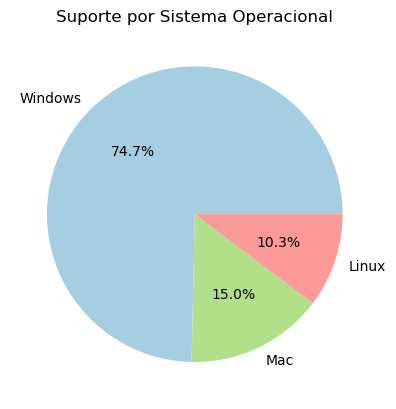

In [15]:
# Gráfico 1: Percentual de jogos que possuem suporte para cada sistema operacional. Caso um jogo suporte múltiplos sistemas operacionais, contar um “voto” para cada sistema operacional suportado.

src.game.os_support_chart(df)

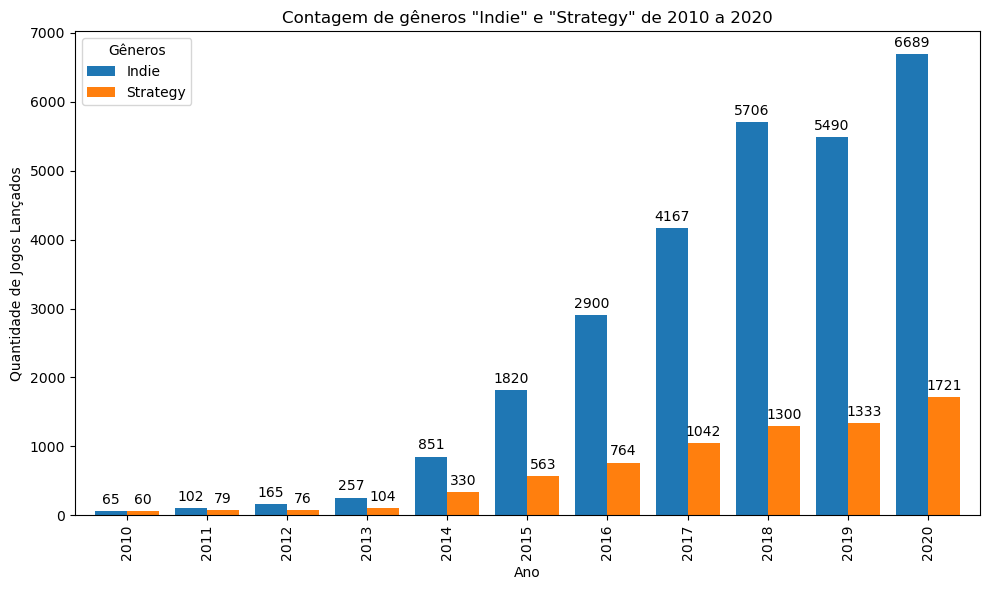

In [16]:
# Gráfico 2: Número total de jogos single-player do gênero Indie e estratégia lançados por ano entre 2010 e 2020 (mostrar tendência para cada gênero separadamente, mas no mesmo gráfico).

src.game.indie_strategy_trend(df)

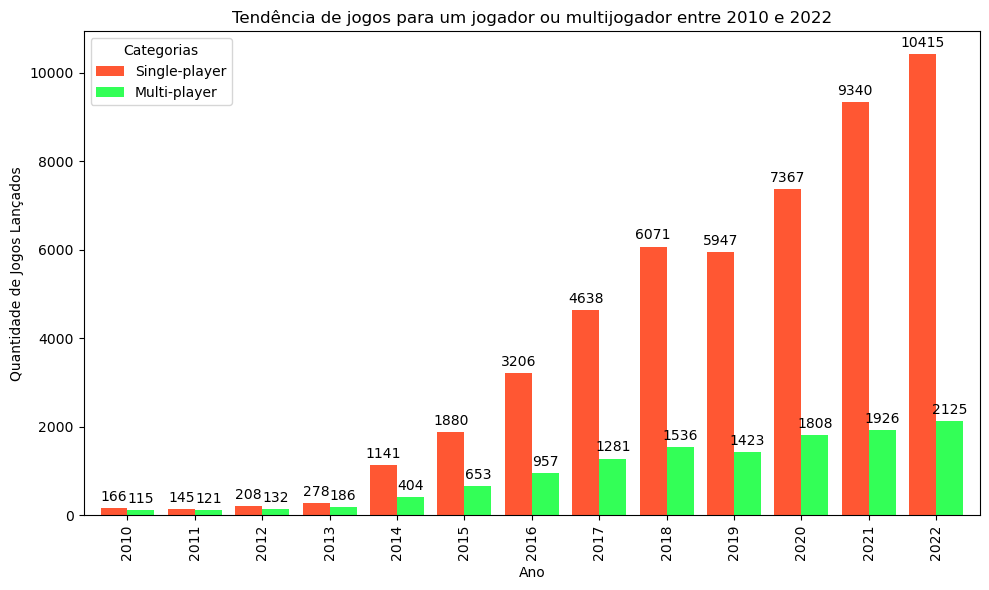

In [17]:
# Gráfico 3: Exploração da tendência entre jogos de único jogador e de multijogador desde 2010 até 2022.
# Obs.: os dados de Single-player são de jogos exclusivamente de único jogador, ou seja, 

src.game.category_trend(df)